<a href="https://colab.research.google.com/github/mkri/master/blob/master/pricePredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
import matplotlib.pyplot as plt

In [41]:
def parser(x):
  return datetime.strptime('202'+x, '%Y-%m')

In [42]:
series = read_csv('/content/datafileN.csv', header=0, parse_dates=[0],  squeeze=True, date_parser=parser)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


In [43]:
series

,Crop,Rice,Wheat,Coarse Cereals,Pulses,Vegetables,Fruits,Milk,"Eggs, Fish and Meat",Oilseeds,Sugarcane,Fibers,All Agriculture
0,2021-05-01,100,100,100,100,100,100,100,100,100,100,100,100
1,2021-06-01,101,101,107,108,109,99,97,102,86,96,92,99
2,2021-07-01,99,112,110,134,103,99,98,101,85,91,91,101
3,2021-08-01,105,115,115,124,118,98,98,100,97,87,96,104
4,2021-09-01,112,117,113,124,113,102,98,99,104,80,109,106
5,2021-10-01,121,127,123,146,124,104,112,116,103,81,107,115
6,2021-11-01,117,120,122,137,128,114,123,133,99,109,138,123
7,2021-12-01,110,108,136,129,115,119,124,137,102,107,140,122


In [44]:
series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Crop                 8 non-null      datetime64[ns]
 1   Rice                 8 non-null      int64         
 2   Wheat                8 non-null      int64         
 3   Coarse Cereals       8 non-null      int64         
 4   Pulses               8 non-null      int64         
 5   Vegetables           8 non-null      int64         
 6   Fruits               8 non-null      int64         
 7   Milk                 8 non-null      int64         
 8   Eggs, Fish and Meat  8 non-null      int64         
 9   Oilseeds             8 non-null      int64         
 10  Sugarcane            8 non-null      int64         
 11  Fibers               8 non-null      int64         
 12  All Agriculture      8 non-null      int64         
dtypes: datetime64[ns](1), int64(12)
memory 

In [45]:
series.isnull().sum()

Crop                   0
Rice                   0
Wheat                  0
Coarse Cereals         0
Pulses                 0
Vegetables             0
Fruits                 0
Milk                   0
Eggs, Fish and Meat    0
Oilseeds               0
Sugarcane              0
Fibers                 0
All Agriculture        0
dtype: int64

In [46]:
series['date_ordinal'] = series['Crop'].apply(lambda x: x.toordinal())

In [47]:
series

,Crop,Rice,Wheat,Coarse Cereals,Pulses,Vegetables,Fruits,Milk,"Eggs, Fish and Meat",Oilseeds,Sugarcane,Fibers,All Agriculture,date_ordinal
0,2021-05-01,100,100,100,100,100,100,100,100,100,100,100,100,737911
1,2021-06-01,101,101,107,108,109,99,97,102,86,96,92,99,737942
2,2021-07-01,99,112,110,134,103,99,98,101,85,91,91,101,737972
3,2021-08-01,105,115,115,124,118,98,98,100,97,87,96,104,738003
4,2021-09-01,112,117,113,124,113,102,98,99,104,80,109,106,738034
5,2021-10-01,121,127,123,146,124,104,112,116,103,81,107,115,738064
6,2021-11-01,117,120,122,137,128,114,123,133,99,109,138,123,738095
7,2021-12-01,110,108,136,129,115,119,124,137,102,107,140,122,738125


In [48]:
series = series.drop(['Crop'], axis=1)
series

,Rice,Wheat,Coarse Cereals,Pulses,Vegetables,Fruits,Milk,"Eggs, Fish and Meat",Oilseeds,Sugarcane,Fibers,All Agriculture,date_ordinal
0,100,100,100,100,100,100,100,100,100,100,100,100,737911
1,101,101,107,108,109,99,97,102,86,96,92,99,737942
2,99,112,110,134,103,99,98,101,85,91,91,101,737972
3,105,115,115,124,118,98,98,100,97,87,96,104,738003
4,112,117,113,124,113,102,98,99,104,80,109,106,738034
5,121,127,123,146,124,104,112,116,103,81,107,115,738064
6,117,120,122,137,128,114,123,133,99,109,138,123,738095
7,110,108,136,129,115,119,124,137,102,107,140,122,738125


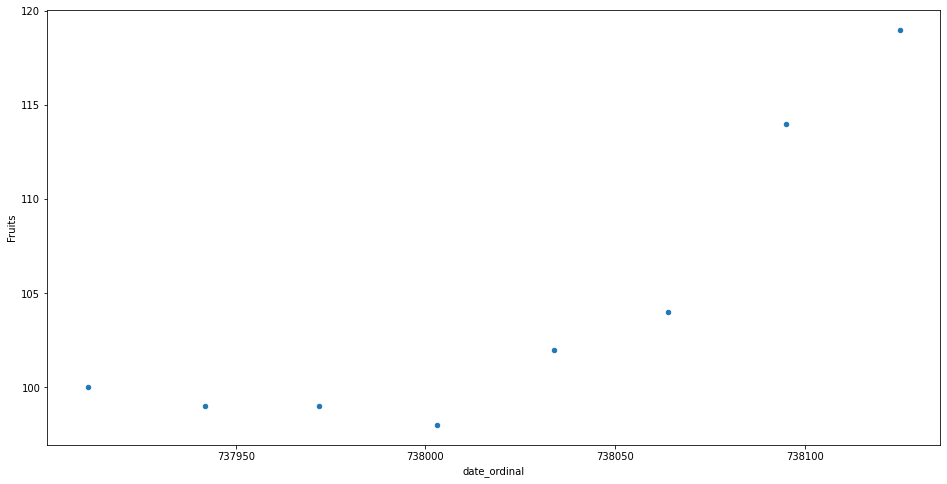

In [49]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 1, sharey=True)
series.plot(kind='scatter', x='date_ordinal', y='Fruits', ax=axs, figsize=(16, 8))

In [50]:
X = series.date_ordinal
y = series.Fruits

In [51]:
X = (X - X.mean()) / (X.max() - X.min())
X

0   -0.501168
1   -0.356308
2   -0.216121
3   -0.071262
4    0.073598
5    0.213785
6    0.358645
7    0.498832
Name: date_ordinal, dtype: float64

In [52]:
# split into train and test sets
train_size = int(len(X) * 0.90)
X_train, X_val = X[:train_size], X[train_size:]
y_train, y_val = y[:train_size], y[train_size:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((7,), (7,), (1,), (1,))

In [53]:
X_train = X_train.values.reshape(-1,1)
X_val = X_val.values.reshape(-1,1)
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((7, 1), (7,), (1, 1), (1,))

In [54]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(800,), random_state=1, solver='lbfgs', max_iter=1000, verbose=True).fit(X_train, y_train)
y_pred = model.predict(X_val)
y_pred

array([121.31540404])

In [55]:
df_val = pd.DataFrame({'Actual': y_val, 'Predicted': y_pred})
df_val

,Actual,Predicted
7,119,121.315404


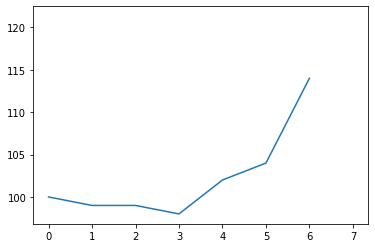

In [56]:
# plot predictions and expected results
plt.plot(y_train)
plt.plot([None for i in y_train] + [x for x in y_val])
plt.plot([None for i in y_train] + [x for x in y_pred])
plt.show()

In [57]:
final_result = pd.DataFrame({'Fruits': series.index[train_size:], 'Sales': y_pred})
final_result

,Fruits,Sales
0,7,121.315404


In [58]:
final_result.to_csv('/content/submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [59]:
#upload submission
submission = pd.read_csv("submission.csv")
submission

,Fruits,Sales
0,7,121.315404
